In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#intervening fit
i_c = pd.read_csv("busyfit_intervening.txt", sep='\t')
#intervening fit without nan or inf or -inf
i_c_2 = i_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

#getting all the file names which have nan or inf or -inf
all_i = i_c.merge(i_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
intervening_non_fit = all_i[all_i['_merge'] == 'left_only']
# for i in intervening_non_fit['Filename'].tolist():
#     print(i)

#associated fit
a_c = pd.read_csv("busyfit_associated_corrected.txt", sep='\t')
#associated fit without nan or inf or -inf
a_c_2 = a_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

all_a = a_c.merge(a_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
associated_non_fit_c = all_a[all_a['_merge'] == 'left_only']
# for i in associated_non_fit_c['Filename'].tolist():
#     print(i)

#adding coloumn int or ass to all fits
i_c_2['Class'] = '1'
a_c_2['Class'] = '0'

i_c_2.reset_index(drop=True, inplace=True)
a_c_2.reset_index(drop=True, inplace=True)

tot_fit = pd.concat([a_c_2, i_c_2])
tot_fit

,Filename,Success,Nchan,dof,chi^2,chi^2/dof,rms,A,dA,B_1,...,dX,W_50,dW_50,W_20,dW_20,F_peak,dF_peak,F_int,dF_int,Class
0,0003+380_ak18.DAT,0,42,37,6.310980e+06,170567.000000,0.01,3.794890e+01,2.029680e+01,0.156570,...,0.000000e+00,0.0000,0.000000e+00,0.0000,0.000000e+00,29.896900,5.351460e-03,0.000000,0.000000e+00,0
1,0035+22_omd+17.DAT,0,57,49,1.092020e+00,0.022286,0.01,4.570920e-03,8.113850e-01,3.539630,...,4.894520e+04,168.5370,2.494620e+05,183.4300,8.668590e+04,0.012289,3.137770e-01,1.455610,7.048980e+02,0
2,0941-08_omd+17.DAT,2,63,58,9.084350e+01,1.566270,0.01,4.636150e-02,5.130390e-03,0.376950,...,3.748890e+17,273.1180,9.999680e+17,319.8790,9.051050e+17,0.046361,5.979700e+04,12.679100,3.345540e+16,0
3,101301.DAT,0,154,149,3.230620e+06,21682.000000,0.01,4.579690e+00,1.953440e-01,5.701480,...,1.160430e+09,674.3710,1.528690e+09,702.0690,1.320860e+09,4.579690,1.326630e-03,3088.790000,1.071930e+10,0
4,1045+35A_adi.DAT,1,157,152,1.209680e+07,79583.900000,0.01,1.723550e+03,1.765720e+04,0.006886,...,0.000000e+00,0.0000,0.000000e+00,0.0000,0.000000e+00,16.346800,2.894770e-03,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,SPEC_J1438d.DAT,0,505,500,1.412480e+01,0.028250,0.01,1.323280e-02,1.296320e-02,0.237052,...,3.900340e+00,18.4012,9.840200e+00,25.9958,1.052260e+01,0.012522,5.776920e-03,0.235370,8.686460e-02,1
44,SPEC_J1443.DAT,1,512,507,5.611800e+00,0.011069,0.01,9.546120e+08,2.517170e+12,0.082519,...,1.533250e+00,8.8789,7.662810e+00,14.0158,9.310070e+01,0.046497,1.050480e-01,0.454052,6.177870e-01,1
45,SPEC_J1551.DAT,0,511,503,8.732810e+00,0.017361,0.01,1.016100e-01,1.258670e+13,3.246860,...,1.441940e+12,72.9568,2.141280e+15,122.4800,4.839690e+15,0.066411,5.235680e+11,0.800432,3.985470e+11,1
46,SPEC_J1639.DAT,0,512,504,1.803290e+02,0.357795,0.01,1.124310e-01,3.582340e-01,0.126561,...,4.944160e-01,23.8519,1.165040e+00,32.6225,1.316030e+00,0.077859,4.274530e-03,1.868390,6.815180e-02,1


In [5]:
tot_fit.iloc[:,15]

0      17.9287
1      43.2115
2      29.7760
3      86.1625
4     246.9760
        ...   
43    249.6600
44    277.2640
45    506.7010
46    234.9830
47    583.8120
Name: XE_0, Length: 126, dtype: float64

In [17]:
feature_names = []
for i in [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]:
    feature_names.append(tot_fit.columns[i])
    print(tot_fit.columns[i])

feature_names = np.array(feature_names)

A
B_1
B_2
C
XE_0
XP_0
W
N
X
W_50
W_20
F_peak
F_int


In [4]:
# input
X = tot_fit.iloc[:, [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]].values
# output
y = tot_fit.iloc[:, 33].values.astype('int')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=0)

In [6]:
# checking the scores for zero rule model

score_list = ['roc_auc', 'accuracy', 'average_precision']

steps_dummy = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', DummyClassifier(strategy='prior'))]
pipeline_dummy = Pipeline(steps=steps_dummy)
for i in score_list:
    print('{} for SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_dummy, X, y, scoring=i, cv=cv, n_jobs=-1)), 3)))

roc_auc for SMOTE Model is 0.5
accuracy for SMOTE Model is 0.619
average_precision for SMOTE Model is 0.381


# XG Boost

In [7]:
steps_xg = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', XGBClassifier(n_estimators=13, max_depth = 3, learning_rate=0.3, random_state=0))]
pipeline_xg = Pipeline(steps=steps_xg)
for i in score_list:
    print('{} for SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_xg, X, y, scoring=i, cv=cv, n_jobs=-1)), 3)))

roc_auc for SMOTE Model is 0.943
accuracy for SMOTE Model is 0.855
average_precision for SMOTE Model is 0.929


Fold 1: 113 training samples, 13 testing samples
Fold 2: 113 training samples, 13 testing samples
Fold 3: 113 training samples, 13 testing samples
Fold 4: 113 training samples, 13 testing samples
Fold 5: 113 training samples, 13 testing samples
Fold 6: 113 training samples, 13 testing samples
Fold 7: 114 training samples, 12 testing samples
Fold 8: 114 training samples, 12 testing samples
Fold 9: 114 training samples, 12 testing samples
Fold 10: 114 training samples, 12 testing samples
Fold 11: 113 training samples, 13 testing samples
Fold 12: 113 training samples, 13 testing samples
Fold 13: 113 training samples, 13 testing samples
Fold 14: 113 training samples, 13 testing samples
Fold 15: 113 training samples, 13 testing samples
Fold 16: 113 training samples, 13 testing samples
Fold 17: 114 training samples, 12 testing samples
Fold 18: 114 training samples, 12 testing samples
Fold 19: 114 training samples, 12 testing samples
Fold 20: 114 training samples, 12 testing samples
Fold 21: 

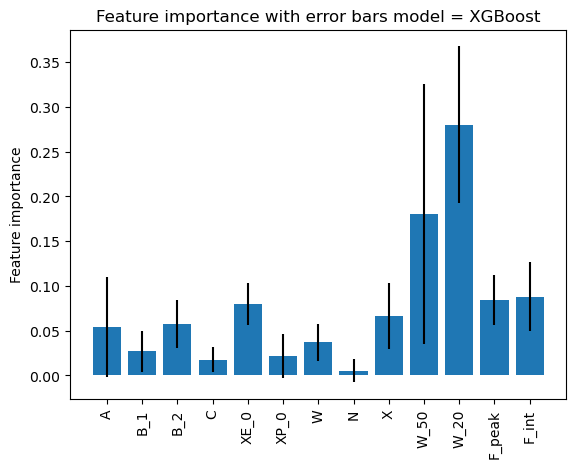

In [20]:
scores = []
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    pipeline_xg.fit(X_train, y_train)
    scores.append(pipeline_xg.named_steps['model'].feature_importances_)
    print(f'Fold {fold + 1}: {len(train_idx)} training samples, {len(test_idx)} testing samples')
    
# Compute average and standard deviation of feature importance scores across folds
scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

# Plot feature importance
fig, ax = plt.subplots()
ax.bar(range(len(X[0])), avg_scores, yerr=std_scores)
ax.set_xticks(range(len(X[0])))
ax.set_xticklabels(feature_names, rotation=90)
# ax.set_xticklabels(range(len(X[0])), rotation=90)
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance with error bars model = XGBoost')
plt.savefig('./figures_corrected/feature_importance_xgboost.png')
plt.show()

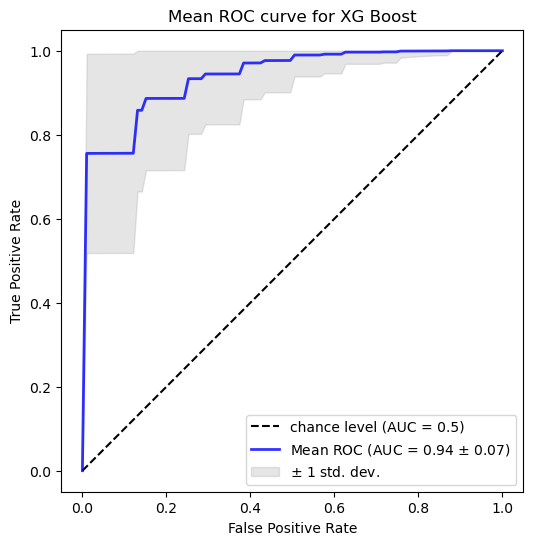

In [8]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_xg

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for XG Boost",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_xgboost_redshift.png')
plt.show()

# Random Forest

In [21]:
steps_rf = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', RandomForestClassifier(n_estimators=13, max_depth=None, random_state=0))]
pipeline_rf = Pipeline(steps=steps_rf)
for i in score_list:
    print('{} for SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_rf, X, y, scoring=i, cv=cv, n_jobs=-1)), 3)))

roc_auc for SMOTE Model is 0.949
accuracy for SMOTE Model is 0.876
average_precision for SMOTE Model is 0.927


Fold 1: 113 training samples, 13 testing samples
Fold 2: 113 training samples, 13 testing samples
Fold 3: 113 training samples, 13 testing samples
Fold 4: 113 training samples, 13 testing samples
Fold 5: 113 training samples, 13 testing samples
Fold 6: 113 training samples, 13 testing samples
Fold 7: 114 training samples, 12 testing samples
Fold 8: 114 training samples, 12 testing samples
Fold 9: 114 training samples, 12 testing samples
Fold 10: 114 training samples, 12 testing samples
Fold 11: 113 training samples, 13 testing samples
Fold 12: 113 training samples, 13 testing samples
Fold 13: 113 training samples, 13 testing samples
Fold 14: 113 training samples, 13 testing samples
Fold 15: 113 training samples, 13 testing samples
Fold 16: 113 training samples, 13 testing samples
Fold 17: 114 training samples, 12 testing samples
Fold 18: 114 training samples, 12 testing samples
Fold 19: 114 training samples, 12 testing samples
Fold 20: 114 training samples, 12 testing samples
Fold 21: 

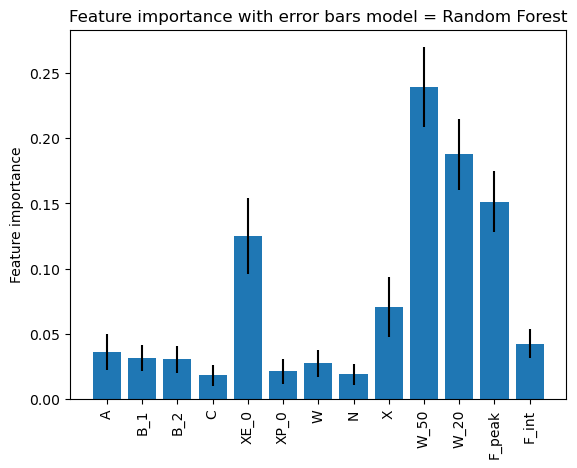

In [22]:
scores = []
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    pipeline_rf.fit(X_train, y_train)
    scores.append(pipeline_rf.named_steps['model'].feature_importances_)
    print(f'Fold {fold + 1}: {len(train_idx)} training samples, {len(test_idx)} testing samples')
    
# Compute average and standard deviation of feature importance scores across folds
scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

# Plot feature importance
fig, ax = plt.subplots()
ax.bar(range(len(X[0])), avg_scores, yerr=std_scores)
ax.set_xticks(range(len(X[0])))
ax.set_xticklabels(feature_names, rotation=90)
# ax.set_xticklabels(range(len(X[0])), rotation=90)
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance with error bars model = Random Forest')
plt.savefig('./figures_corrected/feature_importance_random_forest.png')
plt.show()

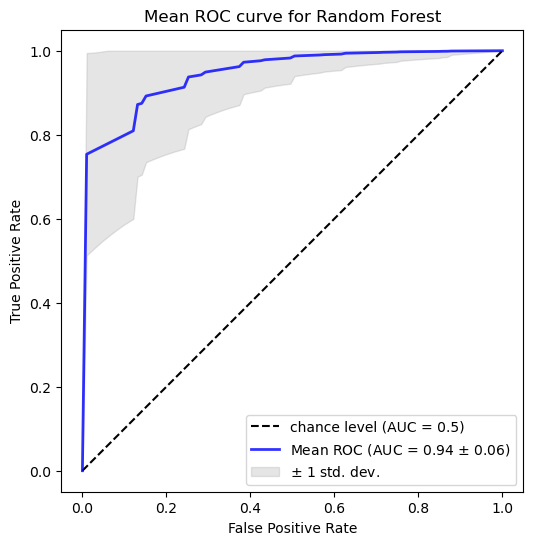

In [10]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_rf

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for Random Forest",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_random_forest_redshift.png')
plt.show()

# KNN

In [26]:
steps_knn = [('scaler', StandardScaler()), ('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', KNeighborsClassifier(n_neighbors=6, n_jobs=-1))]
pipeline_knn = Pipeline(steps=steps_knn)
for i in score_list:
    print('{} for KNN SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_knn, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for KNN SMOTE Model is 0.869
accuracy for KNN SMOTE Model is 0.8
average_precision for KNN SMOTE Model is 0.816


  0%|          | 0/1000 [00:00<?, ?it/s]

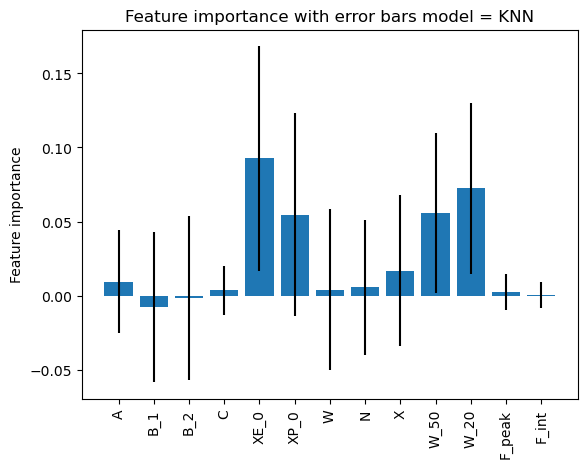

In [32]:
from sklearn.inspection import permutation_importance
from tqdm.notebook import tqdm

scores = []
for fold, (train_idx, test_idx) in tqdm(enumerate(cv.split(X, y)), total=1000):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    pipeline_knn.fit(X_train, y_train)
    result = permutation_importance(pipeline_knn, X_test, y_test, n_repeats=10, random_state=0)
    scores.append(result.importances_mean)
    # print(f'Fold {fold + 1}: {len(train_idx)} training samples, {len(test_idx)} testing samples')
    
# Compute average and standard deviation of feature importance scores across folds
scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

# Plot feature importance
fig, ax = plt.subplots()
ax.bar(range(len(X[0])), avg_scores, yerr=std_scores)
ax.set_xticks(range(len(X[0])))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance with error bars model = KNN')
plt.savefig('./figures_corrected/feature_importance_KNN.png')
plt.show()

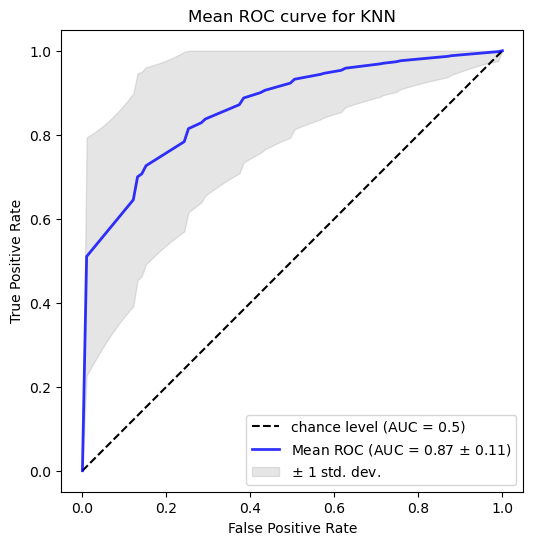

In [12]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_knn

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for KNN",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_knn_redshift.png')
plt.show()

# Decision Tree

In [23]:
steps_dt = [('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3, random_state=0))]
pipeline_dt = Pipeline(steps=steps_dt)
for i in score_list:
    print('{} for DT SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_dt, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for DT SMOTE Model is 0.822
accuracy for DT SMOTE Model is 0.787
average_precision for DT SMOTE Model is 0.738


Fold 1: 113 training samples, 13 testing samples
Fold 2: 113 training samples, 13 testing samples
Fold 3: 113 training samples, 13 testing samples
Fold 4: 113 training samples, 13 testing samples
Fold 5: 113 training samples, 13 testing samples
Fold 6: 113 training samples, 13 testing samples
Fold 7: 114 training samples, 12 testing samples
Fold 8: 114 training samples, 12 testing samples
Fold 9: 114 training samples, 12 testing samples
Fold 10: 114 training samples, 12 testing samples
Fold 11: 113 training samples, 13 testing samples
Fold 12: 113 training samples, 13 testing samples
Fold 13: 113 training samples, 13 testing samples
Fold 14: 113 training samples, 13 testing samples
Fold 15: 113 training samples, 13 testing samples
Fold 16: 113 training samples, 13 testing samples
Fold 17: 114 training samples, 12 testing samples
Fold 18: 114 training samples, 12 testing samples
Fold 19: 114 training samples, 12 testing samples
Fold 20: 114 training samples, 12 testing samples
Fold 21: 

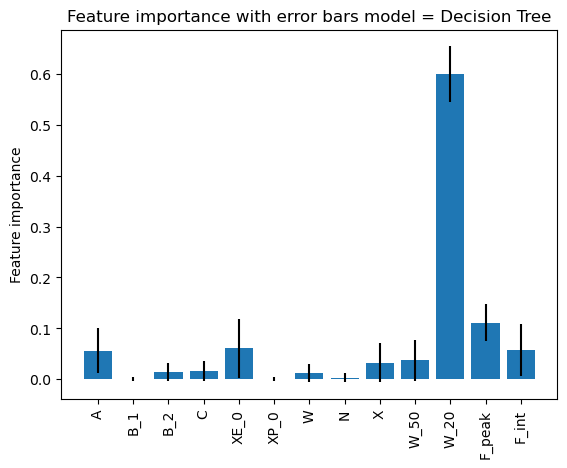

In [24]:
scores = []
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    pipeline_dt.fit(X_train, y_train)
    scores.append(pipeline_dt.named_steps['model'].feature_importances_)
    print(f'Fold {fold + 1}: {len(train_idx)} training samples, {len(test_idx)} testing samples')
    
# Compute average and standard deviation of feature importance scores across folds
scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

# Plot feature importance
fig, ax = plt.subplots()
ax.bar(range(len(X[0])), avg_scores, yerr=std_scores)
ax.set_xticks(range(len(X[0])))
ax.set_xticklabels(feature_names, rotation=90)
# ax.set_xticklabels(range(len(X[0])), rotation=90)
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance with error bars model = Decision Tree')
plt.savefig('./figures_corrected/feature_importance_decision_tree.png')
plt.show()

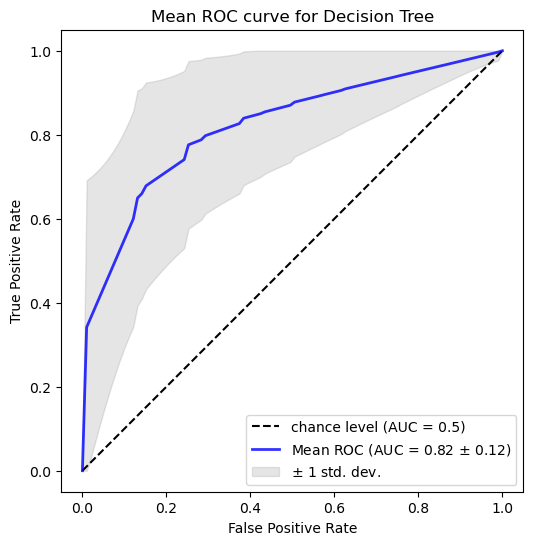

In [14]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_dt

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for Decision Tree",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_dt_redshift.png')
plt.show()

# Logistic Regression

In [33]:
steps_lr = [('scaler', StandardScaler()), ('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', LogisticRegressionCV(Cs = 10, max_iter=300, penalty='l2', random_state=0, solver='liblinear', n_jobs=-1))]
pipeline_lr = Pipeline(steps=steps_lr)
for i in score_list:
    print('{} for LR SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_lr, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for LR SMOTE Model is 0.892
accuracy for LR SMOTE Model is 0.796
average_precision for LR SMOTE Model is 0.855


  0%|          | 0/1000 [00:00<?, ?it/s]

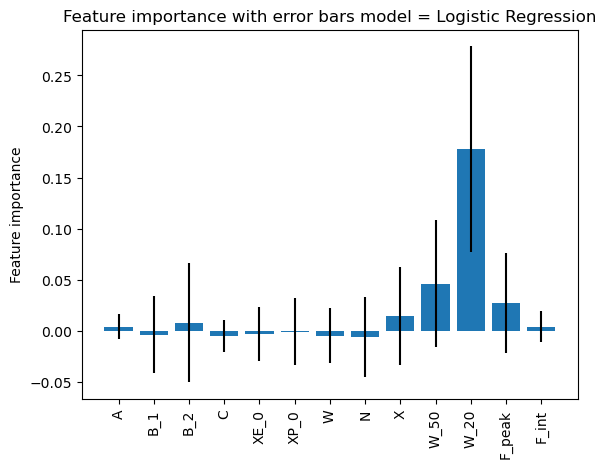

In [34]:
from sklearn.inspection import permutation_importance
from tqdm.notebook import tqdm

scores = []
for fold, (train_idx, test_idx) in tqdm(enumerate(cv.split(X, y)), total=1000):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    pipeline_lr.fit(X_train, y_train)
    result = permutation_importance(pipeline_lr, X_test, y_test, n_repeats=10, random_state=0)
    scores.append(result.importances_mean)
    # print(f'Fold {fold + 1}: {len(train_idx)} training samples, {len(test_idx)} testing samples')
    
# Compute average and standard deviation of feature importance scores across folds
scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

# Plot feature importance
fig, ax = plt.subplots()
ax.bar(range(len(X[0])), avg_scores, yerr=std_scores)
ax.set_xticks(range(len(X[0])))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance with error bars model = Logistic Regression')
plt.savefig('./figures_corrected/feature_importance_LR.png')
plt.show()

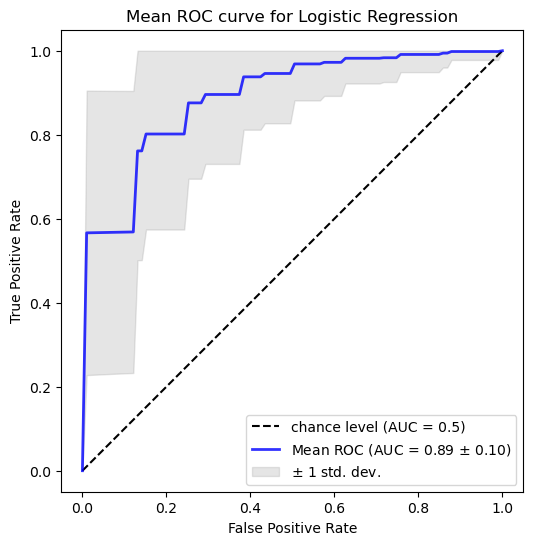

In [16]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_lr

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for Logistic Regression",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_lr_redshift.png')
plt.show()

# SVM

In [35]:
steps_svm = [('scaler', StandardScaler()), ('over', SMOTE(sampling_strategy=1, random_state=0)), ('model', SVC(C=10, coef0=0, degree=2, gamma='scale', kernel='linear', random_state=0, probability=True))]
pipeline_svm = Pipeline(steps=steps_svm)
for i in score_list:
    print('{} for SVM SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(pipeline_svm, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for SVM SMOTE Model is 0.895
accuracy for SVM SMOTE Model is 0.804
average_precision for SVM SMOTE Model is 0.871


  0%|          | 0/1000 [00:00<?, ?it/s]

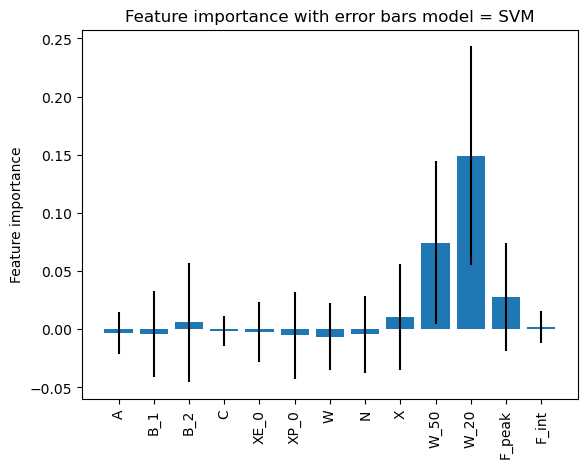

In [36]:
from sklearn.inspection import permutation_importance
from tqdm.notebook import tqdm

scores = []
for fold, (train_idx, test_idx) in tqdm(enumerate(cv.split(X, y)), total=1000):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    pipeline_svm.fit(X_train, y_train)
    result = permutation_importance(pipeline_svm, X_test, y_test, n_repeats=10, random_state=0)
    scores.append(result.importances_mean)
    # print(f'Fold {fold + 1}: {len(train_idx)} training samples, {len(test_idx)} testing samples')
    
# Compute average and standard deviation of feature importance scores across folds
scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

# Plot feature importance
fig, ax = plt.subplots()
ax.bar(range(len(X[0])), avg_scores, yerr=std_scores)
ax.set_xticks(range(len(X[0])))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance with error bars model = SVM')
plt.savefig('./figures_corrected/feature_importance_SVM.png')
plt.show()

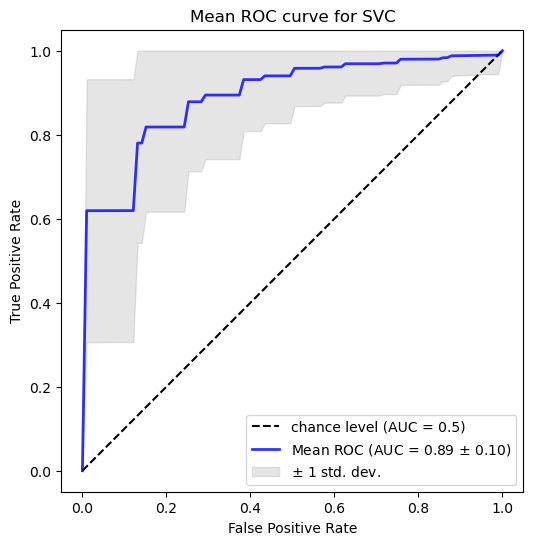

In [18]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = pipeline_svm

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for SVC",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ROC_curve_svm_redshift.png')
plt.show()

# Ensemble

In [38]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('XG Boost', pipeline_xg),
                                        ('Random Forest', pipeline_rf),
                                        ('Decision Tree', pipeline_dt),
                                        ('KNN', pipeline_knn),
                                        ('SVM', pipeline_svm),
                                        ('Logistic Regression', pipeline_lr)],
                             voting='soft', n_jobs=-1)

for i in score_list:
    print('{} for SVM SMOTE Model is {}'.format(i, round(np.mean(cross_val_score(ensemble, X, y, scoring=i, cv=cv, n_jobs=-1)),3)))

roc_auc for SVM SMOTE Model is 0.948
accuracy for SVM SMOTE Model is 0.873
average_precision for SVM SMOTE Model is 0.937


  0%|          | 0/1000 [00:00<?, ?it/s]

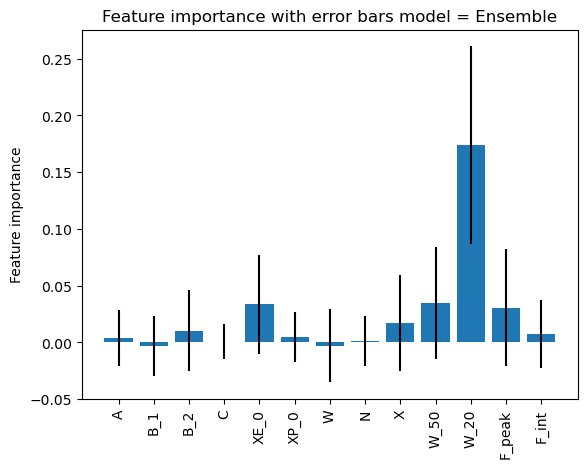

In [39]:
from sklearn.inspection import permutation_importance
from tqdm.notebook import tqdm

scores = []
for fold, (train_idx, test_idx) in tqdm(enumerate(cv.split(X, y)), total=1000):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    ensemble.fit(X_train, y_train)
    result = permutation_importance(ensemble, X_test, y_test, n_repeats=10, random_state=0)
    scores.append(result.importances_mean)
    # print(f'Fold {fold + 1}: {len(train_idx)} training samples, {len(test_idx)} testing samples')
    
# Compute average and standard deviation of feature importance scores across folds
scores = np.array(scores)
avg_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

# Plot feature importance
fig, ax = plt.subplots()
ax.bar(range(len(X[0])), avg_scores, yerr=std_scores)
ax.set_xticks(range(len(X[0])))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_ylabel('Feature importance')
ax.set_title('Feature importance with error bars model = Ensemble')
plt.savefig('./figures_corrected/feature_importance_ensemble.png')
plt.show()

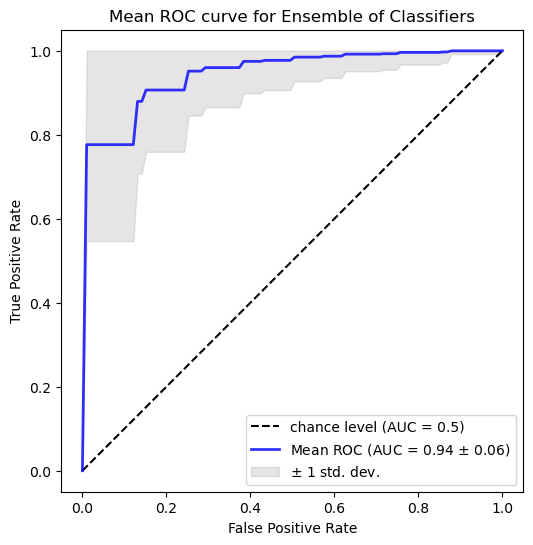

In [25]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

classifier = ensemble

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_prob = classifier.predict_proba(X[test])[:,1]
    fpr, tpr, _ = roc_curve(y[test], y_prob)
    roc_auc = auc(fpr, tpr)
    # viz = RocCurveDisplay.from_estimator(
    #     classifier,
    #     X[test],
    #     y[test],
    #     #name=f"ROC fold {fold}",
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve for Ensemble of Classifiers",
)
ax.axis("square")
ax.legend(loc="lower right")

plt.gcf()
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:]
labels = labels[:]
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.savefig('./figures_corrected/ensemble_redshift.png')
plt.show()

# MSE Plots

In [36]:
def mse_array(x):
    return np.mean((x - np.mean(x)) ** 2, dtype=float)

In [37]:
model1_scores = mse_array(cross_val_score(pipeline_rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model2_scores = mse_array(cross_val_score(pipeline_dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model3_scores = mse_array(cross_val_score(pipeline_svm, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model4_scores = mse_array(cross_val_score(pipeline_xg, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model5_scores = mse_array(cross_val_score(pipeline_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1))
model6_scores = mse_array(cross_val_score(pipeline_lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1))

print(model1_scores, model2_scores, model3_scores, model4_scores, model5_scores, model6_scores)

0.00827292899408284 0.011912377999671271 0.011790629150230112 0.009527526462853387 0.012095048652202501 0.01270843261012492


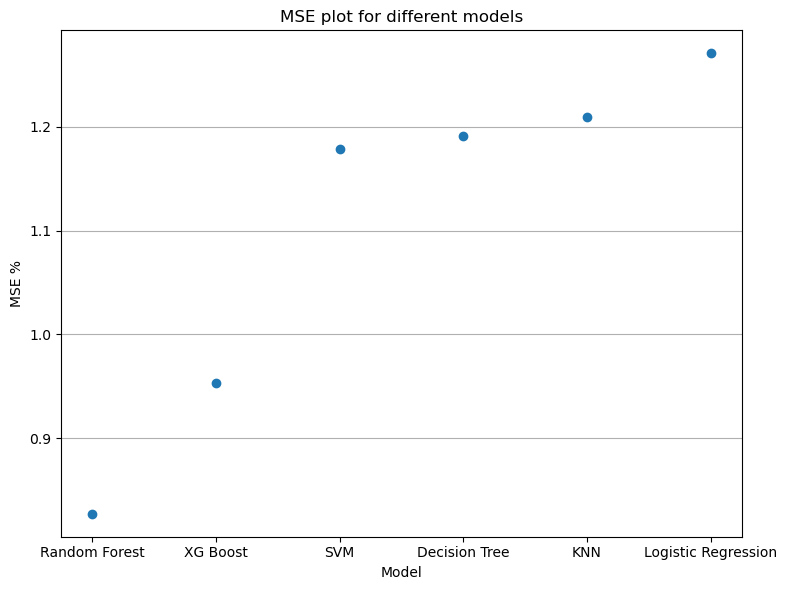

In [39]:
class_labels = ['Random Forest', 'XG Boost', 'SVM', 'Decision Tree', 'KNN', 'Logistic Regression']
all_scores = [model1_scores*100, model4_scores*100, model3_scores*100, model2_scores*100, model5_scores*100, model6_scores*100]

# Create histogram plot
fig, ax = plt.subplots(figsize=(8, 6))


ax.scatter(class_labels, all_scores, alpha=1)

ax.set_xlabel('Model')
ax.set_ylabel('MSE %')
ax.set_title('MSE plot for different models')

ax.yaxis.grid(True)

fig.tight_layout()

plt.savefig('./figures_corrected/mse_plot_fig_all_machine_learning_models_redshift.png')
plt.show()

# Nueral Network

In [66]:
import tensorflow as tf
import tensorflow

from tensorflow import keras
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

2023-01-26 19:25:24.537938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 19:25:24.882014: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-26 19:25:24.969333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anirudh/anaconda3/envs/igwn-py39/bin:/home/anirudh/local/src/lib:
2023-01-26 19:25:24.9693

In [71]:
X_smote, y_smote = SMOTE(sampling_strategy=1).fit_resample(X, y)
X_smote = (pd.DataFrame(X_smote)).iloc[:, [0,1,2,3,4,5,6,7,8]].values
y_smote = pd.DataFrame(y_smote).iloc[:, 0].values.astype('int')

2023-01-26 19:27:14.833142: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anirudh/anaconda3/envs/igwn-py39/bin:/home/anirudh/local/src/lib:
2023-01-26 19:27:14.834770: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-26 19:27:14.834799: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: anirudh-ubuntu
2023-01-26 19:27:14.834803: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: anirudh-ubuntu
2023-01-26 19:27:14.834892: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-01-26 19:27:14.834918: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 5

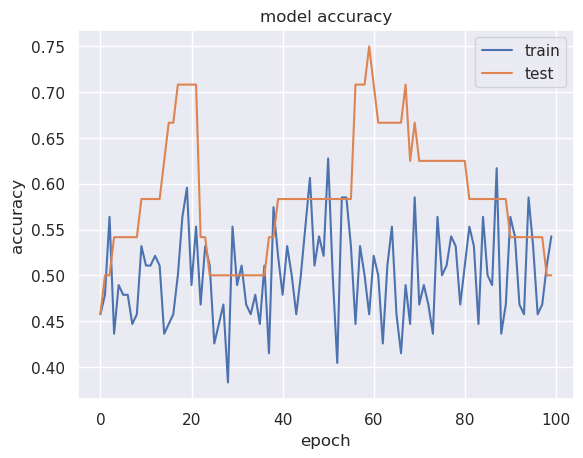

1/1 [==============================] - 0s 91ms/step


Text(109.44999999999997, 0.5, 'Actual label')

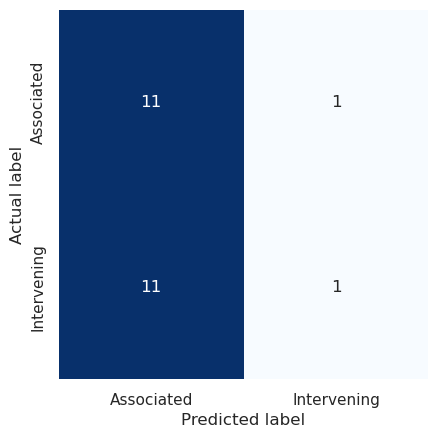

In [72]:
import seaborn as sns
sns.set()

xtrain_nn, xtest_nn, y_train_nn, y_test_nn = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=0)
# xtrain_nn = sc_x.fit_transform(xtrain_nn)
# xtest_nn = sc_x.transform(y_train)

tf.keras.backend.clear_session()
tf.random.set_seed(0)
model=keras.models.Sequential([

    keras.layers.Dense(13, input_dim = xtrain_nn.shape[1], activation='ReLU'),  
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=8, activation='ReLU'),  
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=4, activation='ReLU'),   
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    # keras.layers.Dense(units=3, activation='ReLU'),
    keras.layers.Dense(units=1, activation="sigmoid"),])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=10**(-3)), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_name = './NN_Checklist/model_2/Weights-{epoch:03d}--{val_loss:.5f}.h5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
history = model.fit(xtrain_nn, y_train_nn, epochs=100, validation_data=(xtest_nn, y_test_nn), callbacks=callbacks_list, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


y_pred_nn = model.predict(xtest_nn) > 0.5
mat = confusion_matrix(y_test_nn, y_pred_nn)
labels = ['Associated', 'Intervening']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Convolution Neural Network

In [1]:
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

2023-02-05 22:38:21.063747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 22:38:21.177146: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-05 22:38:21.181592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anirudh/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/cv2/../../lib64:/home/anirudh

In [2]:
ass = np.sort( glob('./dataset/Associated/*') )
inte = np.sort( glob('./dataset/Intervening/*') )

In [3]:
ass_list = []
for i in ass:
    name = i
    label = 0
    ass_list.append([name, label])

In [4]:
int_list = []
for i in inte:
    name = i
    label = 1
    int_list.append([name, label])

In [5]:
tot_list = np.vstack((ass_list, int_list))

In [6]:
import pandas as pd
df = pd.DataFrame(tot_list, columns = ['file_name','label'])

In [7]:
df

,file_name,label
0,./dataset/Associated/0.png,0
1,./dataset/Associated/1.png,0
2,./dataset/Associated/10.png,0
3,./dataset/Associated/11.png,0
4,./dataset/Associated/12.png,0
...,...,...
102,./dataset/Intervening/5.png,1
103,./dataset/Intervening/6.png,1
104,./dataset/Intervening/7.png,1
105,./dataset/Intervening/8.png,1


In [14]:
rescale = ImageDataGenerator(rescale = 1/255, validation_split=0.2)

In [15]:
# #to remove .ipynb_checkpoints folder
# import os
# dir = os.listdir('./dataset')
# print(dir)
# file_path = ('./dataset/.ipynb_checkpoints')
# os.rmdir(file_path)

train_generator = rescale.flow_from_directory(
    './dataset/',
    target_size=(200,200),
    # batch_size=3,
    color_mode='grayscale',
    class_mode='binary',
    subset='training') # set as training data

validation_generator = rescale.flow_from_directory(
    './dataset/', # same directory as training data
    target_size=(200, 200),
    # batch_size=3,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation') # set as validation data

Found 87 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [39]:
model = tf.keras.models.Sequential(
[ tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(200, 200, 1)),
 tf.keras.layers.MaxPool2D(2, 2),
 #
 # tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
 # tf.keras.layers.MaxPool2D(2, 2),
 #
 tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
 tf.keras.layers.MaxPool2D(2, 2),
 #
 tf.keras.layers.Flatten(),
 #
 tf.keras.layers.Dense(12, activation='relu'),
 #
 # tf.keras.layers.Dense(8, activation='relu'),
 #
 tf.keras.layers.Dense(1, activation='sigmoid')
]
)

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10**(-3)), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = './NN_Checklist/model_2/Weights-{epoch:03d}--{val_loss:.5f}.h5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

model_fit = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/30
3/3 [==============================] - 1s 296ms/step - loss: 0.6858 - accuracy: 0.5287 - val_loss: 0.6643 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 208ms/step - loss: 0.6297 - accuracy: 0.7471 - val_loss: 0.6476 - val_accuracy: 0.6000
Epoch 3/30
3/3 [==============================] - 1s 227ms/step - loss: 0.5670 - accuracy: 0.7931 - val_loss: 0.6211 - val_accuracy: 0.6000
Epoch 4/30
3/3 [==============================] - 1s 189ms/step - loss: 0.5049 - accuracy: 0.8161 - val_loss: 0.6013 - val_accuracy: 0.6500
Epoch 5/30
3/3 [==============================] - 1s 185ms/step - loss: 0.4414 - accuracy: 0.8621 - val_loss: 0.5908 - val_accuracy: 0.6500
Epoch 6/30
3/3 [==============================] - 1s 198ms/step - loss: 0.3823 - accuracy: 0.8966 - val_loss: 0.5837 - val_accuracy: 0.7000
Epoch 7/30
3/3 [==============================] - 1s 196ms/step - loss: 0.3269 - accuracy: 0.9425 - val_loss: 0.5629 - val_accuracy: 0.6000
Epoch 8/30
3/3 [====

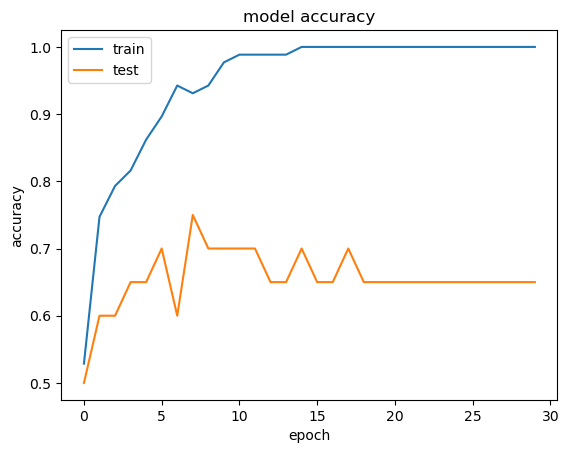

In [42]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# y_pred_nn = model.predict(xtest_nn) > 0.5
# mat = confusion_matrix(y_test_nn, y_pred_nn)
# labels = ['Associated', 'Intervening']
 
# sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted label')
# plt.ylabel('Actual label')